# WEEK5 DAY3 

# Dummy Variable
Dummy variable is use to include categorical data into a regression model


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns 
sns.set()

In [3]:
data = pd.read_csv('1.03.+Dummies.csv')

In [5]:
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})

In [7]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [8]:
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [54]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 18 May 2023   Prob (F-statistic):           2.19e-15
Time:                        12:34:35   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

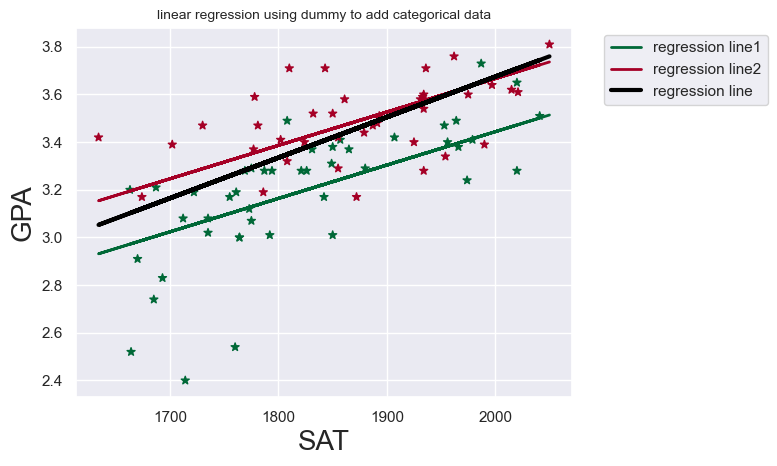

In [55]:
plt.scatter(data['SAT'],y,marker='*',c= data['Attendance'],cmap='RdYlGn_r')

yhat_No = 0.6439+0.0014*data['SAT']
yhat_Yes = 0.8665+0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'],yhat_No,label='regression line1', lw=2,c='#006837')
fig =plt.plot(data['SAT'],yhat_Yes,label='regression line2', lw=2,c='#a50026')
fig =plt.plot(data['SAT'],yhat, label='regression line', lw=3,c='black')
plt.title('linear regression using dummy to add categorical data', fontsize = 10
        )

plt.ylabel('GPA', fontsize=20)
plt.xlabel('SAT', fontsize=20)
              

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Making Predictions

In [56]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [57]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670], 'Attendance':[0,1]})

In [59]:
new_data= new_data[['const','SAT','Attendance']]

In [60]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [61]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [62]:
predictions = results.predict(new_data)

In [65]:
predictionsdf= pd.DataFrame({'predictions':predictions})

In [66]:
joined = new_data.join(predictionsdf)

In [67]:
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
